# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# print(lat_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['ponta delgada',
 'lesosibirsk',
 'atuona',
 'avarua',
 'port alfred',
 'cape town',
 'saint george',
 'niamey',
 'amderma',
 'ushuaia',
 'bima',
 'barentsburg',
 'punta arenas',
 'slanic-moldova',
 'lampa',
 'port macquarie',
 'sira',
 'bredasdorp',
 'kaitangata',
 'gravdal',
 'huazolotitlan',
 'okha',
 'bambous virieux',
 'thompson',
 'russell',
 'namibe',
 'mataura',
 'inhambane',
 'albany',
 'hilo',
 'alotau',
 'qaanaaq',
 'constitucion',
 'illoqqortoormiut',
 'cidreira',
 'mamallapuram',
 'nemuro',
 'kapaa',
 'dikson',
 'kodiak',
 'bengkulu',
 'belushya guba',
 'carahue',
 'matara',
 'marcona',
 'puerto ayora',
 'vaini',
 'katsuura',
 'bafoulabe',
 'fairbanks',
 'tiksi',
 'beringovskiy',
 'upernavik',
 'bluff',
 'kahului',
 'mar del plata',
 'empangeni',
 'bonavista',
 'hanna',
 'isangel',
 'labuhan',
 'souillac',
 'mehamn',
 'tilichiki',
 'hamilton',
 'torbay',
 'new norfolk',
 'busselton',
 'komsomolskiy',
 'imeni poliny osipenko',
 'chingirlau',
 'grand river south east',
 'na

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
# city = "hambantota"
api_key = weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# query_url
# response = requests.get(query_url + city).json()
# print(json.dumps(response, indent=2, sort_keys=True))

In [4]:
#create empty list to append API data to list:

City_name = []
cloudiness =[]
country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_temp = []
Wind_speed = []

# Start the call counter 
record = 1

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        City_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_temp.append(response["main"]["temp_max"])
        Wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{query_url}&q={city}")
                       
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
       
    except:
         print("City not found... skipping.")
    continue
            
print("-------------------")          
# print(json.dumps(response, indent=2, sort_keys=True))      
            
        




Processing Record 1 | Ponta Delgada
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=ponta delgada
Processing Record 2 | Lesosibirsk
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=lesosibirsk
Processing Record 3 | Atuona
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=atuona
Processing Record 4 | Avarua
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=avarua
Processing Record 5 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=port alfred
Processing Record 6 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=cape town
Processing Record 7 | Saint George
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9

Processing Record 56 | Mehamn
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=mehamn
Processing Record 57 | Tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=tilichiki
Processing Record 58 | Hamilton
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=hamilton
Processing Record 59 | Torbay
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=torbay
Processing Record 60 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=new norfolk
Processing Record 61 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=busselton
Processing Record 62 | Yangi Marg`ilon
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0b

City not found... skipping.
Processing Record 111 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=tasiilaq
Processing Record 112 | Sungai Penuh
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=sungaipenuh
Processing Record 113 | Salalah
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=salalah
Processing Record 114 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=nanortalik
City not found... skipping.
Processing Record 115 | Itaguaí
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=itaguai
Processing Record 116 | East London
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=east london
Processing Record 117 | Yinchuan
http://api

Processing Record 165 | Gbarnga
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=gbarnga
City not found... skipping.
Processing Record 166 | Hasaki
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=hasaki
Processing Record 167 | Colombo
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=colombo
Processing Record 168 | Codrington
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=codrington
Processing Record 169 | Mahébourg
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=mahebourg
Processing Record 170 | Lienz
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=lienz
City not found... skipping.
Processing Record 171 | Sitka
http://api.openweathermap.org/data

Processing Record 219 | Yulara
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=yulara
Processing Record 220 | Canchungo
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=canchungo
Processing Record 221 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=arraial do cabo
Processing Record 222 | Tigil'
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=tigil
Processing Record 223 | Suntar
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=suntar
Processing Record 224 | Ulaangom
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=ulaangom
Processing Record 225 | Krasnogvardeyskiy
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b

City not found... skipping.
Processing Record 274 | Abhā
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=abha
Processing Record 275 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=taoudenni
Processing Record 276 | Forsytheganj
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=svetlogorsk
Processing Record 277 | Keningau
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=keningau
Processing Record 278 | San Jose
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=san jose
Processing Record 279 | Batemans Bay
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=batemans bay
City not found... skipping.
Processing Record 280 | Mvuma
http://api.openwe

Processing Record 329 | Acapulco de Juárez
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=acapulco
Processing Record 330 | Aitape
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=aitape
Processing Record 331 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=coquimbo
Processing Record 332 | Karratha
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=karratha
Processing Record 333 | Darnah
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=darnah
Processing Record 334 | Chimbote
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=chimbote
Processing Record 335 | Kisangani
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0

Processing Record 385 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=zhigansk
Processing Record 386 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=flin flon
Processing Record 387 | Bassano
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=bassano
Processing Record 388 | Bubaque
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=bubaque
Processing Record 389 | Teya
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=teya
Processing Record 390 | Te Anau
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=te anau
Processing Record 391 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&

Processing Record 440 | Çermik
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=cermik
City not found... skipping.
Processing Record 441 | Lincoln
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=lincoln
Processing Record 442 | Singaraja
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=singaraja
Processing Record 443 | Noumea
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=noumea
City not found... skipping.
Processing Record 444 | ‘Āhuimanu
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=ahuimanu
Processing Record 445 | Narodychi
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=narodychi
Processing Record 446 | Mikhaylovka
http://api.openweathermap

Processing Record 495 | Tadine
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=tadine
Processing Record 496 | Holetown
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=holetown
Processing Record 497 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=quatre cocos
Processing Record 498 | Bahir Dar
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=bahir dar
Processing Record 499 | Nhulunbuy
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=nhulunbuy
Processing Record 500 | Shaoguan
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7090e9ee0bede3b6aa&units=Imperial&q=&q=shaoguan
Processing Record 501 | Alekseyevsk
http://api.openweathermap.org/data/2.5/weather?appid=B03c1070fff24b7

In [5]:
# response

## Convert Raw Data to DataFrame
* Save as csv

In [6]:
#creating a dataframe:
weather_df = pd.DataFrame({"City_name":City_name,
                         "Cloudiness": cloudiness,
                         "Country": country,
                         "Date":Date,
                         "Humidity":Humidity,
                         "Latitude":Lat,
                         "Longitude":Lng,
                         "Max_temperature": Max_temp,
                         "Wind_speed": Wind_speed})
weather_df
# type(Date)
# print (weather_df.dtypes)

,City_name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max_temperature,Wind_speed
0,Ponta Delgada,20,PT,1602991595,72,37.73,-25.67,60.80,8.05
1,Lesosibirsk,100,RU,1602991596,77,58.24,92.48,45.59,12.12
2,Atuona,1,PF,1602991597,76,-9.80,-139.03,78.30,14.07
3,Avarua,94,CK,1602991598,69,-21.21,-159.78,77.00,14.99
4,Port Alfred,100,ZA,1602991599,87,-33.59,26.89,62.26,16.42
...,...,...,...,...,...,...,...,...,...
542,Port Keats,52,AU,1602992183,59,-14.25,129.55,88.32,7.96
543,Abdulino,78,RU,1602992184,87,53.70,53.67,33.93,6.76
544,Hargeisa,0,SO,1602992185,49,9.56,44.06,69.40,5.41
545,Am Timan,30,TD,1602992187,72,11.03,20.28,71.11,2.73


In [7]:
#Save the dataframe as CSV:
weather_csv = weather_df.to_csv("output_data/weather_df.csv", index=False)
weather_csv 
weather_df.count()

City_name          547
Cloudiness         547
Country            547
Date               547
Humidity           547
Latitude           547
Longitude          547
Max_temperature    547
Wind_speed         547
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


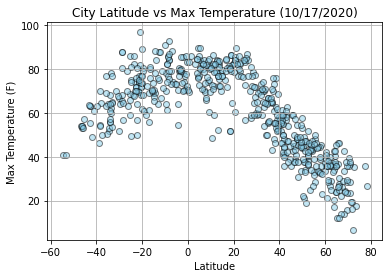

In [8]:
today = time.strftime("%m/%d/%Y")
plt.scatter(weather_df["Latitude"], weather_df["Max_temperature"], edgecolors="black", facecolors="skyblue", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True)
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.savefig("output_data/figure1.png")


print("The plot proves that as we generally move away from the equator, temperature drops")



### Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


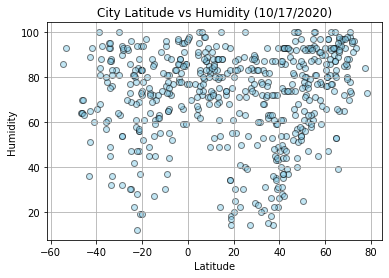

In [9]:

today = time.strftime("%m/%d/%Y")
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors="black", facecolors="skyblue", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs Humidity ({today})")
plt.grid(b=True)
plt.savefig("output_data/figure2.png")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")






### Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


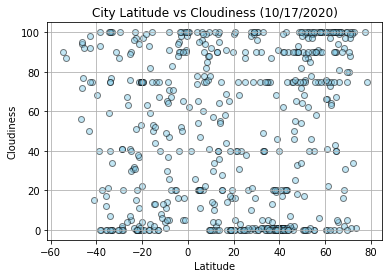

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolors="black", facecolors="skyblue", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.grid(b=True)
plt.savefig("output_data/figure3.png")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")




### Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


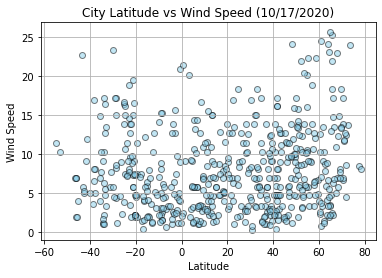

In [11]:
today = time.strftime("%m/%d/%Y")
plt.scatter(weather_df["Latitude"], weather_df["Wind_speed"], edgecolors="black", facecolors="skyblue", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.grid(b=True)
plt.savefig("output_data/figure4.png")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")



## Linear Regression

### Write linear regression plot function (optional)

In [12]:
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]

southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.89x + 89.57
The r-squared is: 0.7966758685851423


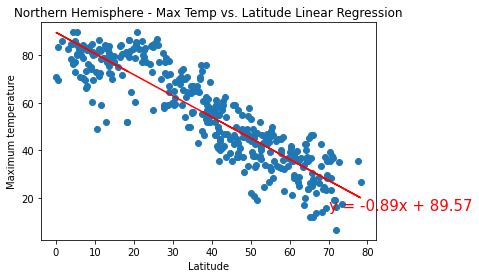

The regression displays a negative correlation
In Northern hemisphere, temperature decreases as we move away from the equator


In [24]:
x_values = northern_df['Latitude']
y_values = northern_df['Max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum temperature')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("output_data/figure_reg1.png")
plt.show()
print("The regression displays a negative correlation")
print("In Northern hemisphere, temperature decreases as we move away from the equator")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.53x + 81.7
The r-squared is: 0.38767896623445003


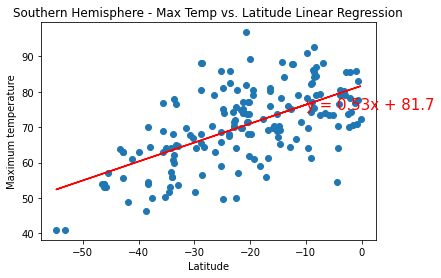

The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


In [15]:
x_values = southern_df['Latitude']
y_values = southern_df['Max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum temperature')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("output_data/figure_reg2.png")
plt.show()
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.16x + 65.85
The r-squared is: 0.021935568717408115


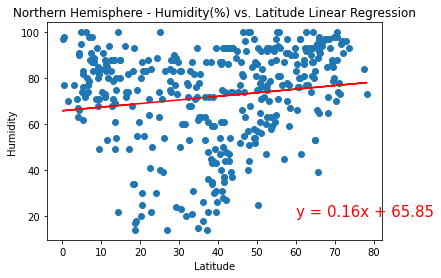

The regression does not display much of a correlation between the data sets.


In [16]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.savefig("output_data/figure_reg3.png")
plt.show()
print("The regression does not display much of a correlation between the data sets.")

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.1x + 73.35
The r-squared is: 0.004308599987684079


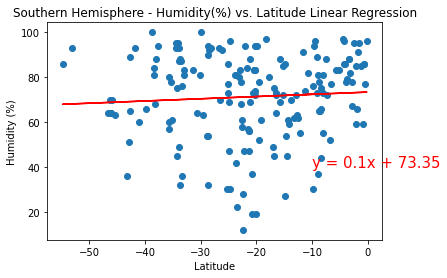

The regression does not display much of a correlation between the data sets.


In [17]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.savefig("output_data/figure_reg4.png")
plt.show()
print("The regression does not display much of a correlation between the data sets.")

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.41x + 34.19
The r-squared is: 0.04213164125311929


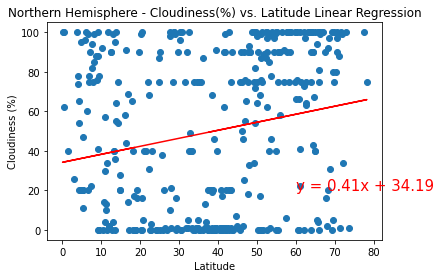

The regression does not display much of a correlation between the data sets.


In [18]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.savefig("output_data/figure_reg5.png")
plt.show()
print("The regression does not display much of a correlation between the data sets.")

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 48.61
The r-squared is: 0.0001817347977619441


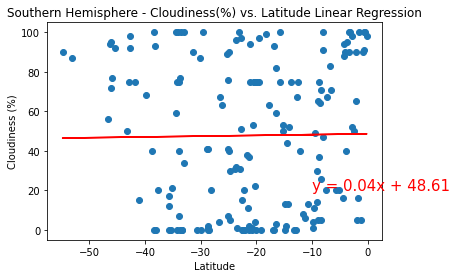

The regression does not display much of a correlation between the data sets.


In [22]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.savefig("output_data/figure_reg6.png")
plt.show()
print("The regression does not display much of a correlation between the data sets.")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.06x + 5.75
The r-squared is: 0.05216811627998678


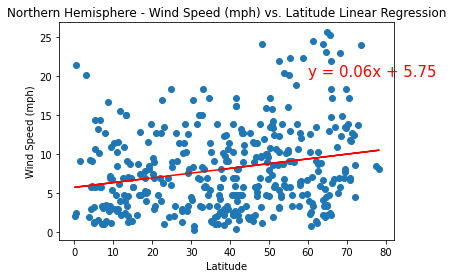

The regression does not display much of a correlation between the data sets.


In [20]:
x_values = northern_df['Latitude']
y_values = northern_df['Wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("output_data/figure_reg7.png")
plt.show()
print("The regression does not display much of a correlation between the data sets.")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.07x + 5.7
The r-squared is: 0.03460431104564502


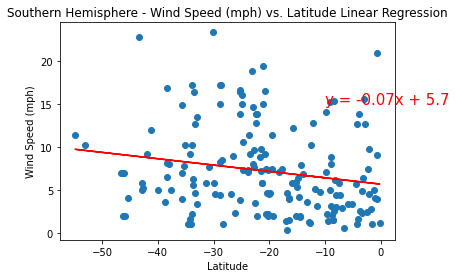

The regression does not display much of a correlation between the data sets.


In [21]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("output_data/figure_reg8.png")
plt.show()
print("The regression does not display much of a correlation between the data sets.")